In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

from mpl_finance import candlestick_ohlc

import matplotlib.dates as mdates
import datetime as dt
from datetime import date, timedelta
from datetime import timedelta, datetime

In [ ]:
import warnings
warnings.filterwarnings("ignore")

In [12]:
df = pd.read_csv('./Data/BTC-USD-19.07.csv',sep=',', date_parser=True)
df.drop('Adj Close', inplace = True, axis=1)
df['Date'] = pd.to_datetime(df['Date'])
df.set_index('Date',inplace=True)

In [13]:
End = '2018-10-19'

In [14]:
df = df.loc[:End]

In [15]:
df.index = df.index.map(mdates.date2num)

In [16]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Float64Index: 1494 entries, 16330.0 to 17823.0
Data columns (total 5 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Open    1494 non-null   float64
 1   High    1494 non-null   float64
 2   Low     1494 non-null   float64
 3   Close   1494 non-null   float64
 4   Volume  1494 non-null   float64
dtypes: float64(5)
memory usage: 70.0 KB


No handles with labels found to put in legend.


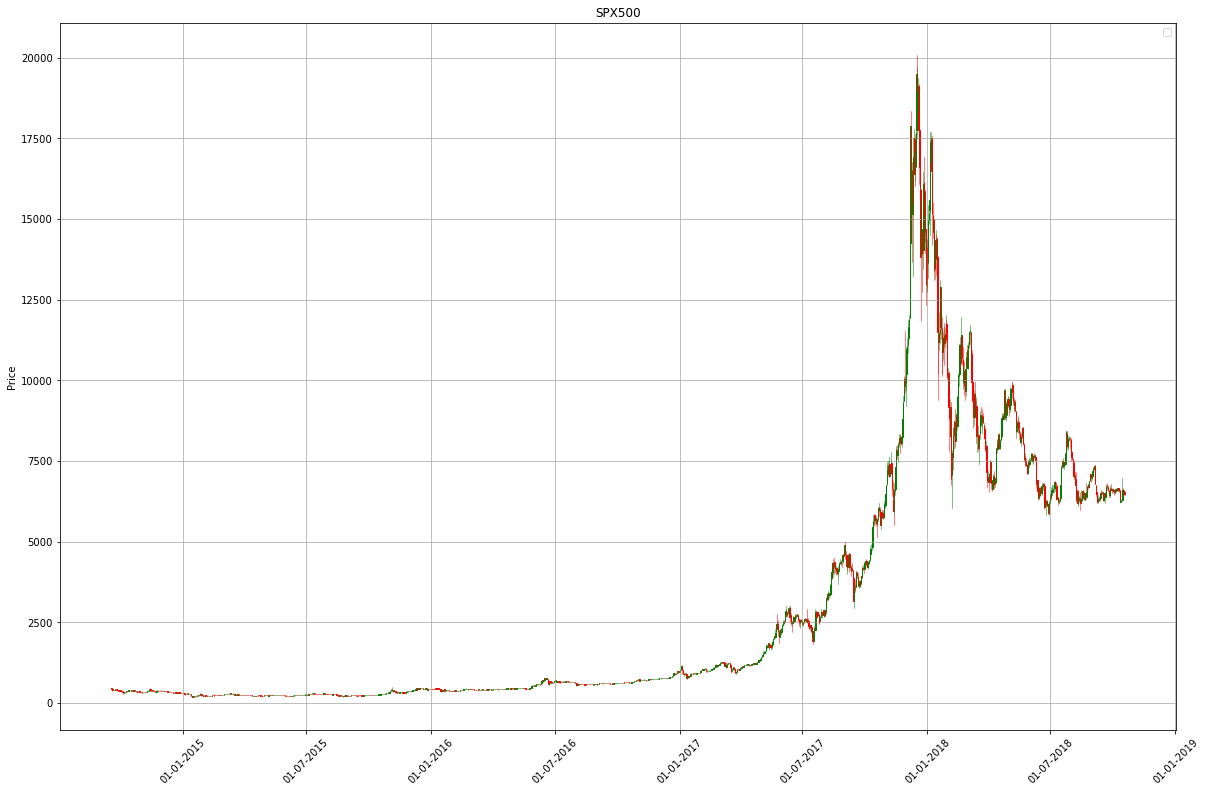

In [17]:
df.reset_index(inplace = True)
fig = plt.figure(figsize=(20,13))
ax1 = fig.add_subplot(111)
ax2 = fig.add_subplot(111)
ax3 = fig.add_subplot(111)
ax4 = fig.add_subplot(111)

ax1.xaxis_date()
ax1.xaxis.set_major_formatter(mdates.DateFormatter('%d-%m-%Y'))

plt.ylabel("Price")
plt.title('SPX500')
ax1.grid(True)
plt.legend(loc='best')
plt.xticks(rotation=45)
candlestick_ohlc(ax1, df.values, width=0.6, colorup='g', colordown='r')
plt.show()

In [18]:
df = pd.read_csv('./data/BTC-USD-19.07.csv',sep=',', date_parser=True)
df.drop('Adj Close', inplace = True, axis=1)
df['Date'] = pd.to_datetime(df['Date'])
df.set_index('Date',inplace=True)

In [19]:
end = '2019-09-06'

In [20]:
df = df.loc[End:end]

In [21]:
df.index = df.index.map(mdates.date2num)

No handles with labels found to put in legend.


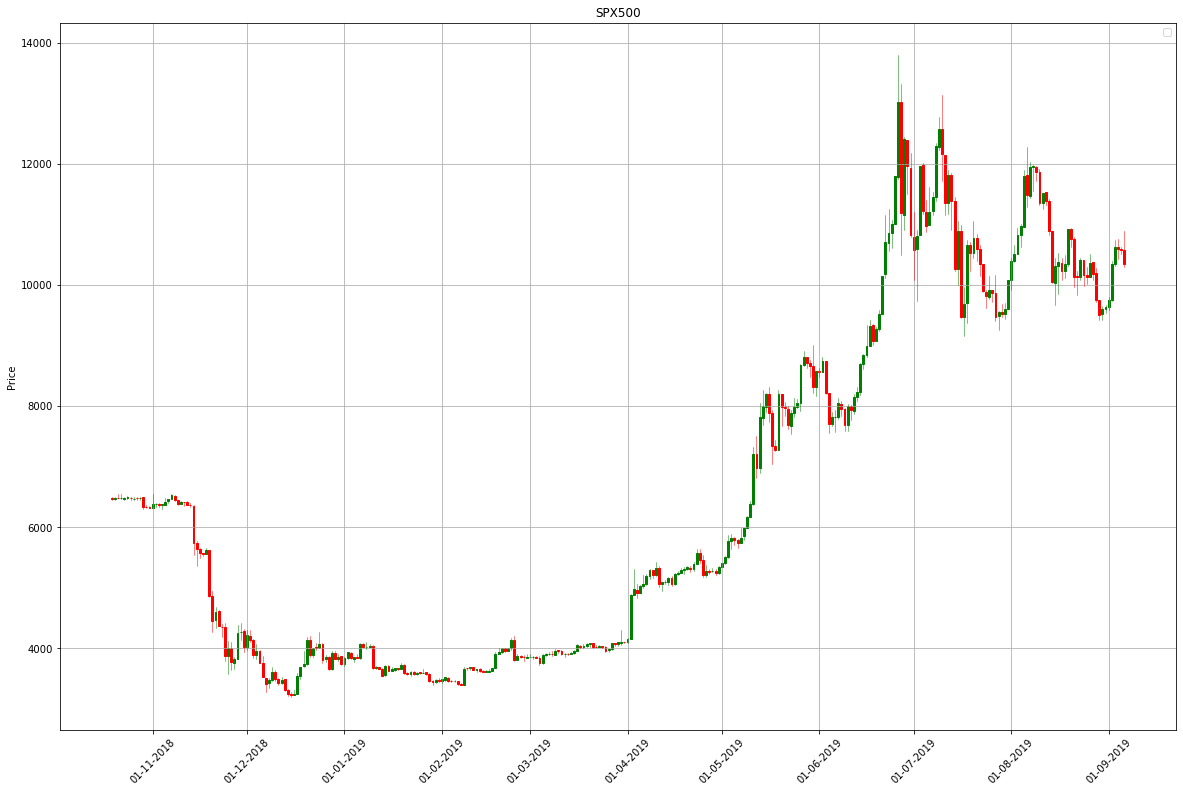

In [22]:
df.reset_index(inplace = True)
fig = plt.figure(figsize=(20,13))
ax1 = fig.add_subplot(111)
ax2 = fig.add_subplot(111)
ax3 = fig.add_subplot(111)
ax4 = fig.add_subplot(111)

ax1.xaxis_date()
ax1.xaxis.set_major_formatter(mdates.DateFormatter('%d-%m-%Y'))

plt.ylabel("Price")
plt.title('SPX500')
ax1.grid(True)
plt.legend(loc='best')
plt.xticks(rotation=45)
candlestick_ohlc(ax1, df.values, width=0.6, colorup='g', colordown='r')
plt.show()

In [263]:
End = pd.to_datetime(End)
Start = (End - timedelta(days=548))
df1 = df.loc[Start:End]
df1.index = df1.index.map(mdates.date2num)

In [264]:
Min_pozycja = df1['Low'].argmin()
Max_pozycja = df1['High'].argmax()

Pierwszy trend:  Wzrostowy
Max/Min:  Wcześniej niż 5 dni od końca
------------------------------------------------------------------------------
TREND L1
Znaleziona 2 punkty przez które można przeprowadzić trend L1 wzrostowy
Punkt A:[16672.0, 199.567001], Punkt C: [16793.0, 306.00073495955803]
------------------------------------------------------------------------------
TREND M1
Znaleziona 2 punkty przez które można przeprowadzić linie trendu
Punkt A:[16970.0, 777.98999], Punkt C: [17045.0, 564.1204042857062]


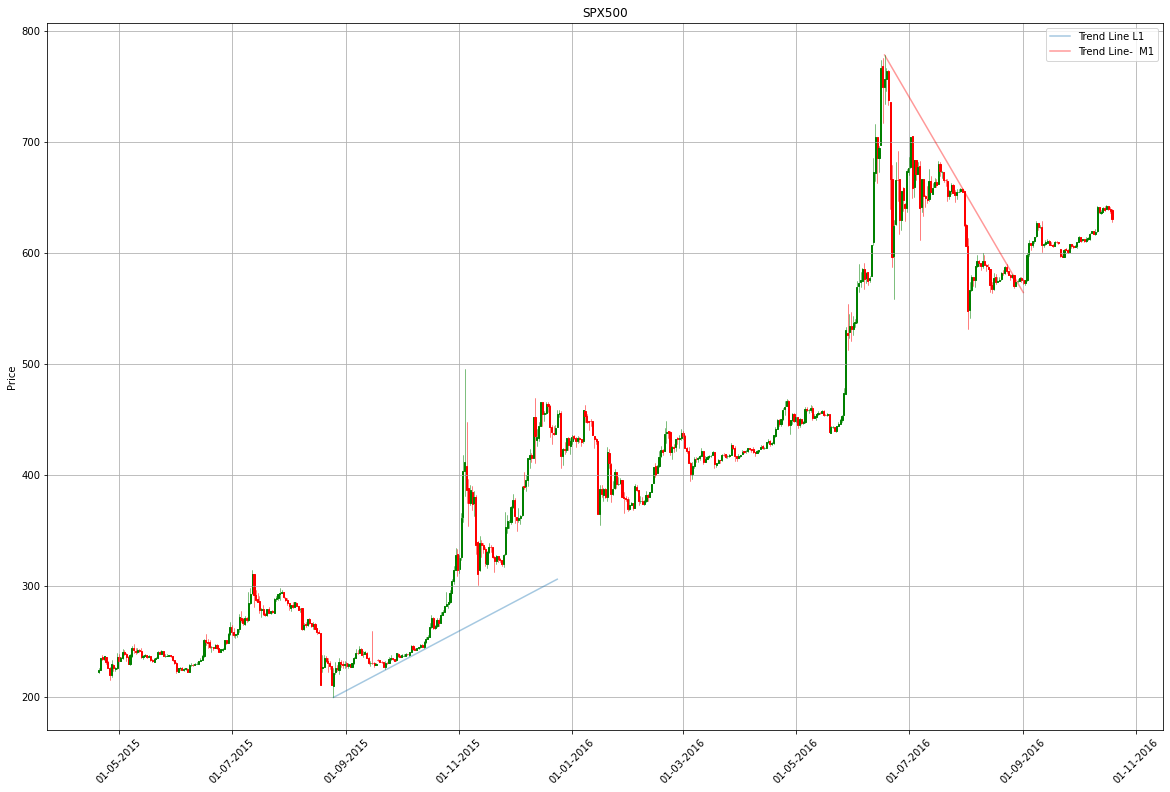

ok


In [265]:
if Min_pozycja < Max_pozycja and Max_pozycja >= len(df1)-10:
    
    # Trend L1 wzrostowy, liczony od połowy wykresu
    End = pd.to_datetime(End)
    Start = (End - timedelta(days=180))
    df1 = df.loc[Start:End]
    df1.index = df1.index.map(mdates.date2num)
    
    Min_pozycja = df1['Low'].argmin()
    Max_pozycja = df1['High'].argmax()
    
    Max_idx = df1.iloc[Max_pozycja].name
    Ax = df1.iloc[Min_pozycja].name
    Ay = df1['Low'].loc[Ax]
    A = [Ax, Ay]
    
    Bx = df1.iloc[Min_pozycja].name
    By = df1['Low'].loc[Bx]
    B = [Bx, By]
    
    a = (Ay-By)/(Ax-Bx)
    b = By - a*Bx
    
    df11=df1[A[0]:Max_idx]
    df11['Pozycja na LT'] = df11.index * a + b
    df11['check']= round(df11['Low'] - df11['Pozycja na LT'],0)
    good = df11['check'][df11['check']>=0].count()
    sum = len(df11['check'])
    
    for i in range(len(df11)):
        
        df11=df1[B[0]:Max_idx]
        Bx = df11.iloc[0].name
        By = df11['Low'].loc[Bx]
        B = [Bx, By]

        a = (Ay-By)/(Ax-Bx)
        b = By - a*Bx

        df11['Pozycja na LT'] = df11.index * a + b
        df11['check']= round(df11['Low'] - df11['Pozycja na LT'],0)
        good = df11['check'][df11['check']>=0].count()
        sum = len(df11['check'])

        if good == sum:
            print('Pierwszy trend:  Wzrostowy')
            print('Max/Min:  W ostatnich 5 dniach')
            print('------------------------------------------------------------------------------')
            print('TREND L1')
            print('Znaleziona 2 punkty przez które można przeprowadzić linie trendu L1 - wzrostowy')
            print(f'Punkt A:{A}, Punkt B: {B}')
            print('------------------------------------------------------------------------------')
            break
            
        else:
            df11=df1[B[0]+1:Max_idx]
            Bx = df11.iloc[0].name
            By = df11['Low'].loc[Bx]
            B = [Bx, By]

            a = (Ay-By)/(Ax-Bx)
            b = By - a*Bx
                

        X_long = [Ax, Bx]
        Y_long = [Ay, By]
        
    Last_low_price = df1.iloc[-1]['Low']
    Last_low_price_position = df1.iloc[-1].name
    Trend_price = Last_low_price_position * a + b
    
    for i in range(len(df1)-len(df11)):
        
        Last_low_price = df1.iloc[-1]['Low']
        Last_low_price_position = df1.iloc[-1].name
        Trend_price = Last_low_price_position * a + b
        
        Ax = Bx
        Ay = By
        A = [Ax, Ay]

        Bx = Ax
        By = Ay
        B = [Bx, By]

        a = (Ay-By)/(Ax-Bx)
        b = By - a*Bx
        
        if Trend_price >= Last_low_price:
            print('TREND M2 - właściwy')
            print(f'Punkt A:{A}, Punkt B: {B}')
            break
    
        else:
            
            Ax = Bx
            Ay = By
            A = [Ax, Ay]

            Bx = Ax
            By = Ax
            B = [Bx, By]

            a = (Ay-By)/(Ax-Bx)
            b = By - a*Bx

            df21 = df1[A[0]:Max_idx]
            df21['Pozycja na LT'] = df21.index * a + b
            df21['check']= round(df21['Low'] - df21['Pozycja na LT'],0)
            good = df21['check'][df21['check']>=0].count()
            sum = len(df21['check'])

            for i in range(len(df21)):

                df21=df1[B[0]:Max_idx]
                Bx = df21.iloc[0].name
                By = df21['Low'].loc[Bx]
                B = [Bx, By]

                a = (Ay-By)/(Ax-Bx)
                b = By - a*Bx

                df21['Pozycja na LT'] = df21.index * a + b
                df21['check']= round(df21['Low'] - df21['Pozycja na LT'],0)
                good = df21['check'][df21['check']>=0].count()
                sum = len(df21['check'])

                if good == sum:

                    print('TREND M1 - pomocniczy')
                    print(f'Punkt A:{A}, Punkt B: {B}')
                    print('------------------------------------------------------------------------------')
                    break

                else:
                    df21=df1[B[0]+1:Max_idx]
                    Bx = df21.iloc[0].name
                    By = df21['Low'].loc[Bx]
                    B = [Bx, By]

                    a = (Ay-By)/(Ax-Bx)
                    b = By - a*Bx
                    
                    Cx = df1.index.max()+2
                    Cy = a*Cx +b
                    C = [Cx, Cy]

                    X_mid1 = [Ax, Cx]
                    Y_mid1 = [Ay, Cy]

            
    # Wykres
    
    df1.reset_index(inplace = True)
    fig = plt.figure(figsize=(20,13))
    ax1 = fig.add_subplot(111)
    ax2 = fig.add_subplot(111)
    ax3 = fig.add_subplot(111)
    

    ax1.xaxis_date()
    ax1.xaxis.set_major_formatter(mdates.DateFormatter('%d-%m-%Y'))
    ax2.plot(X_long, Y_long, label='Trend Line- L1', alpha = 0.4)
    ax3.plot(X_mid1, Y_mid1, label='Trend Line-  M2', alpha = 0.4)
    

    plt.ylabel("Price")
    plt.title('SPX500')
    ax1.grid(True)
    plt.legend(loc='best')
    plt.xticks(rotation=45)
    candlestick_ohlc(ax1, df1.values, width=0.6, colorup='g', colordown='r')
    plt.show()
    
#==========================================================================================            
elif Min_pozycja < Max_pozycja and Max_pozycja < len(df1)-10:
    
    
    #Trend wzrostowy L1
    
    Max_idx = df1.iloc[Max_pozycja].name
    Ax = df1.iloc[Min_pozycja].name
    Ay = df1['Low'].loc[Ax]
    A = [Ax, Ay]
    
    Bx = df1.iloc[Min_pozycja].name
    By = df1['Low'].loc[Bx]
    B = [Bx, By]
    
    a = (Ay-By)/(Ax-Bx)
    b = By - a*Bx
    
    df11=df1[A[0]:Max_idx]
    df11['Pozycja na LT'] = df11.index * a + b
    df11['check']= round(df11['Low'] - df11['Pozycja na LT'],0)
    good = df11['check'][df11['check']>=0].count()
    sum = len(df11['check'])
    
    for i in range(len(df11)):
        df11=df1[B[0]:Max_idx]
        Bx = df11.iloc[0].name
        By = df11['Low'].loc[Bx]
        B = [Bx, By]

        a = (Ay-By)/(Ax-Bx)
        b = By - a*Bx

        df11['Pozycja na LT'] = df11.index * a + b
        df11['check']= round(df11['Low'] - df11['Pozycja na LT'],0)
        good = df11['check'][df11['check']>=0].count()
        sum = len(df11['check'])

        if good == sum:
            
            print('Pierwszy trend:  Wzrostowy')
            print('Max/Min:  Wcześniej niż 5 dni od końca')
            print('------------------------------------------------------------------------------')
            print('TREND L1')
            print('Znaleziona 2 punkty przez które można przeprowadzić trend L1 wzrostowy')
            print(f'Punkt A:{A}, Punkt C: {C}')
            print('------------------------------------------------------------------------------')
            break
        else:
            df11=df1[B[0]+1:Max_idx]
            Bx = df11.iloc[0].name
            By = df11['Low'].loc[Bx]
            B = [Bx, By]

            a = (Ay-By)/(Ax-Bx)
            b = By - a*Bx
                
            Cx = df1.index.max() - 300
            Cy = a*Cx +b
            C = [Cx, Cy]

            X_long = [Ax, Cx]
            Y_long = [Ay, Cy]
    
    
    #--------------------------------------------------------------------
    # Trend spadkowy M1
    df2 = df1.iloc[Max_pozycja:]
    Min_pozycja2 = df2['Low'].argmin()
    Max_idx2 = df2.iloc[Min_pozycja2].name
    
    
    Ax = df2.iloc[0].name
    Ay = df2['High'].loc[Ax]
    A = [Ax, Ay]
    
    Bx = df2.iloc[0].name
    By = df2['High'].loc[Bx]
    B = [Bx, By]
    
    a = (Ay-By)/(Ax-Bx)
    b = By - a*Bx
    
    df21 = df2[A[0]:Max_idx2]
    df21['Pozycja na LT'] = df21.index * a + b
    df21['check']= round(df21['High'] - df21['Pozycja na LT'],0)
    good = df21['check'][df21['check']<=0].count()
    sum = len(df21['check'])
    
    for i in range(len(df21)):
        
        df21=df2[B[0]:Max_idx2]
        Bx = df21.iloc[0].name
        By = df21['High'].loc[Bx]
        B = [Bx, By]

        a = (Ay-By)/(Ax-Bx)
        b = By - a*Bx

        df21['Pozycja na LT'] = df21.index * a + b
        df21['check']= round(df21['High'] - df21['Pozycja na LT'],0)
        good = df21['check'][df21['check']<=0].count()
        sum = len(df21['check'])

        if good == sum:
            print('TREND M1')
            print('Znaleziona 2 punkty przez które można przeprowadzić linie trendu')
            print(f'Punkt A:{A}, Punkt C: {C}')
            break
            
        else:
            df21=df2[B[0]+1:Max_idx2]
            Bx = df21.iloc[0].name
            By = df21['High'].loc[Bx]
            B = [Bx, By]

            a = (Ay-By)/(Ax-Bx)
            b = By - a*Bx
                
            Cx = df21.index.max() + 30
            Cy = a*Cx +b
            C = [Cx, Cy]

            X_mid1 = [Ax, Cx]
            Y_mid1 = [Ay, Cy]
            
    df1.reset_index(inplace = True)
    df2.reset_index(inplace = True)
    fig = plt.figure(figsize=(20,13))
    ax1 = fig.add_subplot(111)
    ax2 = fig.add_subplot(111)
    ax3 = fig.add_subplot(111)


    ax1.xaxis_date()
    ax1.xaxis.set_major_formatter(mdates.DateFormatter('%d-%m-%Y'))
    ax2.plot(X_long, Y_long, label='Trend Line L1', alpha = 0.4)
    ax3.plot(X_mid1, Y_mid1, color='r', label='Trend Line-  M1', alpha = 0.4)


    plt.ylabel("Price")
    plt.title('SPX500')
    ax1.grid(True)
    plt.legend(loc='best')
    plt.xticks(rotation=45)
    candlestick_ohlc(ax1, df1.values, width=0.6, colorup='g', colordown='r')
    plt.show()
    
#=======================================================================================

elif Min_pozycja > Max_pozycja and Min_pozycja >= len(df1)-10:
    
    # Trend L1 spadkowy, liczony od połowy okresu
    End = pd.to_datetime(End)
    Start = (End - timedelta(days=182))
    df1 = df.loc[Start:End]
    df1.index = df1.index.map(mdates.date2num)
    
    Min_pozycja = df1['Low'].argmin()
    Max_pozycja = df1['High'].argmax()
    
    Max_idx = df1.iloc[Min_pozycja].name
    Ax = df1.iloc[Max_pozycja].name
    Ay = df1['High'].loc[Ax]
    A = [Ax, Ay]
    
    Bx = df1.iloc[Max_pozycja].name
    By = df1['High'].loc[Bx]
    B = [Bx, By]
    
    a = (Ay-By)/(Ax-Bx)
    b = By - a*Bx
    
    df11=df1[A[0]:Max_idx]
    df11['Pozycja na LT'] = df11.index * a + b
    df11['check']= round(df11['High'] - df11['Pozycja na LT'],0)
    good = df11['check'][df11['check']<=0].count()
    sum = len(df11['check'])
    
    for i in range(len(df11)):
        
        df11=df1[B[0]:Max_idx]
        Bx = df11.iloc[0].name
        By = df11['High'].loc[Bx]
        B = [Bx, By]

        a = (Ay-By)/(Ax-Bx)
        b = By - a*Bx

        df11['Pozycja na LT'] = df11.index * a + b
        df11['check']= round(df11['High'] - df11['Pozycja na LT'],0)
        good = df11['check'][df11['check']<=0].count()
        sum = len(df11['check'])

        if good == sum:
            
            print('Pierwszy trend:  Malejący')
            print('Max/Min:  W ostatnich 5 dniach')
            print('------------------------------------------------------------------------------')
            print('TREND L1')
            print('Znaleziona 2 punkty przez które można przeprowadzić linie trendu L1 - spadkowy')
            print(f'Punkt A:{A}, Punkt B: {B}')
            print('------------------------------------------------------------------------------')
            break
            
        else:
            df11=df1[B[0]+1:Max_idx]
            Bx = df11.iloc[0].name
            By = df11['High'].loc[Bx]
            B = [Bx, By]

            a = (Ay-By)/(Ax-Bx)
            b = By - a*Bx

            X_long = [Ax, Bx]
            Y_long = [Ay, By]
            
    # Trend M1 - styczna pomocnicza od L1
    Ax = Bx
    Ay = By
    A = [Ax, Ay]
    
    Bx = Ax
    By = Ax
    B = [Bx, By]
    
    a = (Ay-By)/(Ax-Bx)
    b = By - a*Bx
    
    df21 = df1[A[0]:Max_idx]
    df21['Pozycja na LT'] = df21.index * a + b
    df21['check']= round(df21['High'] - df21['Pozycja na LT'],0)
    good = df21['check'][df21['check']<=0].count()
    sum = len(df21['check'])
    
    for i in range(len(df21)):
        
        df21=df1[B[0]:Max_idx]
        Bx = df21.iloc[0].name
        By = df21['High'].loc[Bx]
        B = [Bx, By]

        a = (Ay-By)/(Ax-Bx)
        b = By - a*Bx

        df21['Pozycja na LT'] = df21.index * a + b
        df21['check']= round(df21['High'] - df21['Pozycja na LT'],0)
        good = df21['check'][df21['check']<=0].count()
        sum = len(df21['check'])

        if good == sum:
            
            print('TREND M1 - pomocniczy')
            print('Znaleziona 2 punkty przez które można przeprowadzić linie trendu M1 wzrostowego')
            print(f'Punkt A:{A}, Punkt B: {B}')
            print('------------------------------------------------------------------------------')
            break
            
        else:
            df21=df1[B[0]+1:Max_idx]
            Bx = df21.iloc[0].name
            By = df21['High'].loc[Bx]
            B = [Bx, By]

            a = (Ay-By)/(Ax-Bx)
            b = By - a*Bx

            X_mid1 = [Ax, Bx]
            Y_mid1 = [Ay, By]
            
    # Trend M2 - styczna od M1
    Ax = Bx
    Ay = By
    A = [Ax, Ay]
    
    Bx = Ax
    By = Ax
    B = [Bx, By]
    
    a = (Ay-By)/(Ax-Bx)
    b = By - a*Bx
    
    df31 = df1[A[0]:Max_idx]
    df31['Pozycja na LT'] = df31.index * a + b
    df31['check']= round(df31['High'] - df31['Pozycja na LT'],0)
    good = df31['check'][df31['check']<=0].count()
    sum = len(df31['check'])
    
    for i in range(len(df21)):
        
        df31=df1[B[0]:Max_idx]
        Bx = df31.iloc[0].name
        By = df31['High'].loc[Bx]
        B = [Bx, By]

        a = (Ay-By)/(Ax-Bx)
        b = By - a*Bx

        df31['Pozycja na LT'] = df31.index * a + b
        df31['check']= round(df31['High'] - df31['Pozycja na LT'],0)
        good = df31['check'][df31['check']<=0].count()
        sum = len(df31['check'])

        if good == sum:
            
            print('TREND M2')
            print('Znaleziona 2 punkty przez które można przeprowadzić linie trendu M1 wzrostowego')
            print(f'Punkt A:{A}, Punkt B: {B}')
            print('------------------------------------------------------------------------------')
            break
            
        else:
            df31=df1[B[0]+1:Max_idx]
            Bx = df31.iloc[0].name
            By = df31['High'].loc[Bx]
            B = [Bx, By]

            a = (Ay-By)/(Ax-Bx)
            b = By - a*Bx
            
            Cx = df1.index.max()+5
            Cy = a*Cx +b
            C = [Cx, Cy]

            X_mid2 = [Ax, Cx]
            Y_mid2 = [Ay, Cy]
            
    df1.reset_index(inplace = True)
    fig = plt.figure(figsize=(20,13))
    ax1 = fig.add_subplot(111)
    ax2 = fig.add_subplot(111)
    ax3 = fig.add_subplot(111)
    ax4 = fig.add_subplot(111)

    ax1.xaxis_date()
    ax1.xaxis.set_major_formatter(mdates.DateFormatter('%d-%m-%Y'))
    ax2.plot(X_long, Y_long, label='Trend L1', alpha = 0.4)
    ax3.plot(X_mid1, Y_mid1, '--', label='Trend M1', alpha = 0.4)
    ax3.plot(X_mid2, Y_mid2, label='Trend M2', alpha = 0.4)
    plt.ylabel("Price")
    plt.title('SPX500')
    ax1.grid(True)
    plt.legend(loc='best')
    plt.xticks(rotation=45)
    candlestick_ohlc(ax1, df1.values, width=0.6, colorup='g', colordown='r')
    plt.show()

            
#=====================================================================================================================

if Min_pozycja > Max_pozycja and Max_pozycja < len(df1)-10:
    
    # Trend spadkowy L1
    
    Max_idx = df1.iloc[Min_pozycja].name
    Ax = df1.iloc[Max_pozycja].name
    Ay = df1['High'].loc[Ax]
    A = [Ax, Ay]
    
    Bx = df1.iloc[Max_pozycja].name
    By = df1['High'].loc[Bx]
    B = [Bx, By]
    
    a = (Ay-By)/(Ax-Bx)
    b = By - a*Bx
    
    df11=df1[A[0]:Max_idx]
    df11['Pozycja na LT'] = df11.index * a + b
    df11['check']= round(df11['High'] - df11['Pozycja na LT'],0)
    good = df11['check'][df11['check']<=0].count()
    sum = len(df11['check'])
    
    for i in range(len(df11)):
        
        df11=df1[B[0]:Max_idx]
        Bx = df11.iloc[0].name
        By = df11['High'].loc[Bx]
        B = [Bx, By]

        a = (Ay-By)/(Ax-Bx)
        b = By - a*Bx

        df11['Pozycja na LT'] = df11.index * a + b
        df11['check']= round(df11['High'] - df11['Pozycja na LT'],0)
        good = df11['check'][df11['check']<=0].count()
        sum = len(df11['check'])

        if good == sum:
            print('Pierwszy trend:  Malejący')
            print('Max/Min:  Wcześniej niż 5 dni od końca')
            print('------------------------------------------------------------------------------')
            print('TREND L1')
            print('Znaleziona 2 punkty przez które można przeprowadzić linie trendu L1 spadkowy')
            print(f'Punkt A:{A}, Punkt C: {C}')
            print('------------------------------------------------------------------------------')
            break
            
        else:
            df11=df1[B[0]+1:Max_idx]
            Bx = df11.iloc[0].name
            By = df11['High'].loc[Bx]
            B = [Bx, By]

            a = (Ay-By)/(Ax-Bx)
            b = By - a*Bx
                
        Cx = df1.index.max() -220
        Cy = a*Cx +b
        C = [Cx, Cy]

        X_long = [Ax, Cx]
        Y_long = [Ay, Cy]
        
        
# Trend wzrostowy M1
    
    df2 = df1.iloc[Min_pozycja:]
    Max_pozycja2 = df2['High'].argmax()
    Max_idx2 = df2.iloc[Max_pozycja2].name
    
    Ax = df2.iloc[0].name
    Ay = df2['Low'].loc[Ax]
    A = [Ax, Ay]
    
    Bx = df2.iloc[0].name
    By = df2['Low'].loc[Bx]
    B = [Bx, By]
    
    a = (Ay-By)/(Ax-Bx)
    b = By - a*Bx
    
    df21 = df2[A[0]:Max_idx2]
    df21['Pozycja na LT'] = df21.index * a + b
    df21['check']= round(df21['Low'] - df21['Pozycja na LT'],0)
    good = df21['check'][df21['check']>=0].count()
    sum = len(df21['check'])
    
    for i in range(len(df21)):
        
        df21=df2[B[0]:Max_idx2]
        Bx = df21.iloc[0].name
        By = df21['Low'].loc[Bx]
        B = [Bx, By]

        a = (Ay-By)/(Ax-Bx)
        b = By - a*Bx

        df21['Pozycja na LT'] = df21.index * a + b
        df21['check']= round(df21['Low'] - df21['Pozycja na LT'],0)
        good = df21['check'][df21['check']>=0].count()
        sum = len(df21['check'])

        if good == sum:
            print('TREND M1')
            print('Znaleziona 2 punkty przez które można przeprowadzić linie trendu M1 - wzrostowy')
            print(f'Punkt A:{A}, Punkt C: {C}')
            break
            
        else:
            df21=df2[B[0]+1:Max_idx2]
            Bx = df21.iloc[0].name
            By = df21['Low'].loc[Bx]
            B = [Bx, By]

            a = (Ay-By)/(Ax-Bx)
            b = By - a*Bx
                
            Cx = df2.index.max() +5
            Cy = a*Cx +b
            C = [Cx, Cy]

            X_mid1 = [Ax, Cx]
            Y_mid1 = [Ay, Cy]
            
    df1.reset_index(inplace = True)
    df2.reset_index(inplace = True)
    
    fig = plt.figure(figsize=(20,13))
    ax1 = fig.add_subplot(111)
    ax2 = fig.add_subplot(111)
    ax3 = fig.add_subplot(111)
   

    ax1.xaxis_date()
    ax1.xaxis.set_major_formatter(mdates.DateFormatter('%d-%m-%Y'))
    ax2.plot(X_long, Y_long, label='Trend Line- lo', alpha = 0.4)
    ax3.plot(X_mid1, Y_mid1, label='Trend Line-  Short', alpha = 0.4)
   

    plt.ylabel("Price")
    plt.title('SPX500')
    ax1.grid(True)
    plt.legend(loc='best')
    plt.xticks(rotation=45)
    candlestick_ohlc(ax1, df1.values, width=0.6, colorup='g', colordown='r')
    plt.show()
    
else:
    print('ok')

In [ ]:
Bx

In [218]:
b

11943829.160156

In [225]:
df.tail()

Open          High           Low         Close  \
Date                                                                 
2021-06-07  35835.265625  36790.570313  33480.640625  33560.707031   
2021-06-08  33589.519531  34017.386719  31114.443359  33472.632813   
2021-06-09  33416.976563  37537.371094  32475.865234  37345.121094   
2021-06-10  37389.515625  38334.324219  35847.593750  36702.597656   
2021-06-11  36485.035156  37548.804688  36088.992188  37486.933594   

                  Volume  
Date                      
2021-06-07  3.368394e+10  
2021-06-08  4.990205e+10  
2021-06-09  5.397292e+10  
2021-06-10  4.357603e+10  
2021-06-11  4.141848e+10